In [2]:
import pandas as pd
import os

In [3]:
import numpy as np

In [4]:
import time
from tqdm import tqdm

In [5]:
import tensorflow as tf
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [6]:
movie = pd.read_csv("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/MovieGenre.csv", encoding='latin-1')

In [7]:
movie.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [8]:
len(movie)

40108

In [9]:
movie2 = movie.dropna()

In [10]:
movie2.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [11]:
len(movie2)

39246

In [12]:
# for i in range(0, len(movie.Poster)):
#     a = movie.Poster[i]
#     b = movie.Title[i]+".jpg"
#     ! wget -O "$b" "$a"

In [13]:
slash_movie_title = []
for i in range(len(movie.Title)):
    if ('/' in movie.Title[i]):
        slash_movie_title.append(movie.Title[i])
slash_movie_title

['Naked Gun 33 1/3: The Final Insult (1994)',
 'Venice/Venice (1992)',
 'JLG/JLG - autoportrait de dí©cembre (1994)',
 'Face/Off (1997)',
 'Beloved/Friend (1999)',
 'Smoking/No Smoking (1993)',
 'F/X (1986)',
 'F/X2 (1991)',
 'Crazy/Beautiful (2001)',
 'Marat/Sade (1967)',
 'XX/XY (2002)',
 'Bollywood/Hollywood (2002)',
 'Fahrenheit 9/11 (2004)',
 'The Lion King 1 1/2 (2004)',
 'Hijacking Catastrophe: 9/11, Fear & the Selling of American Empire (2004)',
 'Fahrenhype 9/11 (2004)',
 '9/11 (2002)',
 'A/k/a Tommy Chong (2006)',
 'A/k/a Tommy Chong (2006)',
 'White Light/Black Rain: The Destruction of Hiroshima and Nagasaki (2007)',
 'CSNY/DÌ©jÌÊ Vu (2008)',
 'Frost/Nixon (2008)',
 'Trop tÌ«t/Trop tard (1982)',
 'Drama/Mex (2006)',
 'The Bugs Bunny/Road-Runner Movie (1979)',
 '06/05 (2004)',
 'Superman/Batman: Apocalypse (2010)',
 'Loose Change 9/11: An American Coup (2009)',
 'Win/Win (2010)',
 '50/50 (2011)',
 'The Harvest/La Cosecha (2011)',
 '99 and 44/100% Dead (1974)',
 'Superman/Doom

In [14]:
movie3 = movie2[~movie2.Title.isin(slash_movie_title)]

In [15]:
movie = movie3

In [16]:
len(movie)

39180

In [17]:
# ! pip install matplotlib

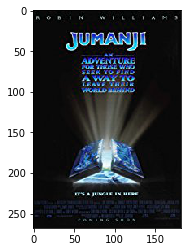

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/Jumanji (1995).jpg")
plt.imshow(img)

In [19]:
img.shape

(268, 182, 3)

In [37]:
x = []
x_titles = []
for name in tqdm((os.listdir("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/"))):
    sb = "/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/"+name
    s = name[:-4]
    x_titles.append(s)
    img = cv2.imread(sb)
    x.append(img)


100%|██████████| 37873/37873 [01:56<00:00, 326.11it/s]


In [38]:
shape_trash = []

In [39]:
for i in range(len(x)):
    if (x[i].shape) != (x[0].shape):
        shape_trash.append(i)

In [40]:
shape_trash

[66,
 8301,
 8363,
 10363,
 12537,
 14014,
 14185,
 14437,
 15879,
 17491,
 18690,
 19702,
 23259,
 26250,
 35533]

In [41]:
counter = 0
for i in shape_trash:
    del x[i-counter]
    del x_titles[i-counter]
    counter+= 1

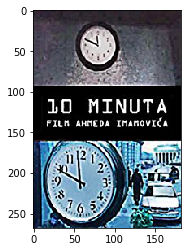

In [42]:
%matplotlib inline
plt.imshow(x[65])

In [43]:
titles = pd.DataFrame(x_titles, columns = ['Title'])

In [44]:
df = pd.merge(titles, movie,how = 'inner', on='Title', copy = False)

In [45]:
len(df)

36720

In [46]:
df = df.drop_duplicates(subset = 'Title')

In [47]:
len(df.Title)

36117

In [48]:
titles2 = df.Title.tolist()

In [49]:
excluded = []
excluded_titles = []
for i in range(len(x_titles)):
    if(x_titles[i] not in titles2):
        excluded.append(i)
        excluded_titles.append(x_titles[i])

In [50]:
counter = 0
for i in excluded:
    del x[i-counter]
    del x_titles[i-counter]
    counter+= 1

In [51]:
len(x_titles)

36117

In [52]:
len(x)

36117

In [53]:
len(x_titles)

36117

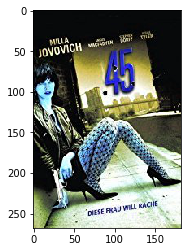

In [54]:
plt.imshow(x[46])

In [55]:
df = df.reset_index(drop = True)

In [56]:
len(df.Title)

36117

In [57]:
col_list = ['Title', 'Genre']

In [58]:
df = df[col_list]

In [59]:
df.head()

,Title,Genre
0,#1 Cheerleader Camp (2010),Comedy
1,#chicagoGirl: The Social Network Takes on a Di...,Documentary|Action|Drama
2,#Horror (2015),Drama|Horror|Mystery
3,#Pellichoopulu (2016),Comedy|Drama|Romance
4,"$1,000 on the Black (1966)",Western


In [60]:
len(df.Title)

36117

In [61]:
len(x)

36117

In [62]:
# one_hot = pd.get_dummies(movie['Genre'])
# df = merge.drop('Genre', axis=1)
df2 = df['Genre'].str.join(sep='').str.get_dummies(sep='|')

In [63]:
df2.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
df2 = df2.join(df, how = 'outer')

In [65]:
len(df2.Action)

36117

In [66]:
df2 = df2.drop(['Genre'],axis = 1)

In [67]:
cols = df2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df2[cols]
df

,Title,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,#1 Cheerleader Camp (2010),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#chicagoGirl: The Social Network Takes on a Di...,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,#Horror (2015),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,#Pellichoopulu (2016),0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,"$1,000 on the Black (1966)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,"$100,000 for Ringo (1965)",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,$5 a Day (2008),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,$50K and a Call Girl: A Love Story (2014),1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,$9.99 (2008),0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,$ellebrity (2012),0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
len(df['Title'])

36117

In [69]:
len(x)

36117

In [70]:
#file_name = "/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/cleaned_movies.csv"

In [71]:
#df.to_csv(file_name)

In [72]:
a = ['Adventure', 'Documentary', 'Romance', 'Horror']
b = [x for x in df.columns if x not in a]
l = df.drop(b, axis = 1)

In [73]:
# df_test = df.drop(['Title'],axis = 1)

In [74]:
# df_test.head()

In [75]:
# y = df_test.values

In [76]:
y = l.values

In [77]:
y.shape

(36117, 4)

In [78]:
x[0].shape

(268, 182, 3)

In [79]:
x = np.stack(x)

In [80]:
x.shape

(36117, 268, 182, 3)

In [81]:
y.shape

(36117, 4)

In [82]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [84]:
input_shape = x_train[0].shape
num_class = y_train.shape[1]
print(input_shape)
print(num_class)

(268, 182, 3)
4


In [85]:
# from Metrics import f1,recall,precision

In [86]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 3
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 5
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# layer 6
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# layer 7
model.add(Dense(num_class))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [87]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(268, 182, 3)))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(.25))

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(268, 182, 3)))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(268, 182, 3)))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(.5))
# model.add(Dense(6))
# model.add(Activation('sigmoid'))

In [88]:
# model.compile(loss='categorical_crossentropy',
#               optimizer='sgd',
#               metrics=['accuracy'])

In [89]:
x_train.shape

(25281, 268, 182, 3)

In [90]:
y_train.shape

(25281, 4)

In [91]:
# x_train = np.array(x_train)
# y_train = np.array(y_train)

In [92]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 266, 180, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 266, 180, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 133, 90, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 131, 88, 32)       9248      
_________________________________________________________________
activation_2 (Activation)    (None, 131, 88, 32)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 65, 44, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 42, 32)        9248      
__________

In [ ]:
model.fit(x_train, y_train,
          batch_size=128, epochs=30, verbose=1)

Epoch 1/30
 1152/25281 [>.............................] - ETA: 59:44 - loss: 4.7306 - acc: 0.6589

In [ ]:
prediction = model.predict(x_test)